# Feature Extraction
## Boundary features 
> * 轮廓是一系列相连的像素点组成的曲线，代表了物体的基本外形。轮廓常用于形状分析和物体的检测和识别。
> * 为了更加准确，要使用二值化图像。在寻找轮廓之前，要进行阈值化处理
或者 Canny 边界检测。
> * 在一些OpenCV 版本中，绘制轮廓操作会改变原始图像。
> * 在OpenCV 中，image要找的物体应该是白色而背景应该是黑色。
> * OpenCV 提供函数 ```cv2.findContours()``` 从二值图像中寻找轮廓，函数 ```cv2.drawContours() ```绘制轮廓。
> * 函数说明：```contours, hierarchy=cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) ```
> * 参数说明：
>   * image：原始图像，8 位单通道二值图像
>   * mode： 轮廓检索模式
>       * cv2.RETR_EXTERNAL：只检索最外层轮廓
>       * cv2.RETR_LIST：检索所有轮廓，不建立任何层次关系
>       * cv2.RETR_CCOMP：检索所有轮廓，并将其组织为两层， 顶层是各部分的外部轮廓，次层是内层轮廓
>       * cv2.RETR_TREE：检索所有轮廓，并重建嵌套轮廓的完整层次结构
>       * cv2.RETR_FLOODFILL：漫水填充法（泛洪填充）
>   * method： 轮廓近似方法
>       * cv2.CHAIN_APPROX_NONE：输出轮廓的每个像素点
>       * cv2.CHAIN_APPROX_SIMPLE：压缩水平、垂直和斜线，仅保留这些线段的端点
>   * 第二个返回值hierarchy是一个Python列表，其中存储这图像中的所有轮廓。每一个轮廓都是一个 Numpy 数组，包含对象边界点（x，y）的坐标。

> * hierarchy[0][i]表示第 i 个轮廓的层次结构，hierarchy [0][i][0]~hierarchy[0][i][3] 分别代表第 i 个轮廓的同层的后一个轮廓、同层的前一个轮廓、第一个子轮廓、父轮廓的编号；其中，-1 表示没有。





> * 函数说明：```image=cv2.drawContours(image, contours, contourIdx, color[, thickness=1, lineType=LINE_8, hierarchy=Mat(), maxLevel=INT_MAX, offset=Point()] )```
> * 参数说明：
>   * image：输入/输出图像，必须是BGR格式的彩色图像
>   * contours： 输入的轮廓列表，每个轮廓由边界点坐标 (x,y) 向量构成
>   * contourIdx：所要绘制的轮廓的编号，-1 表示绘制所有轮廓
>   * color：绘制轮廓的颜色，RGB
>   * thickness：绘制轮廓的线宽，-1 表示轮廓内部填充
>   * lineType：绘制轮廓的线型

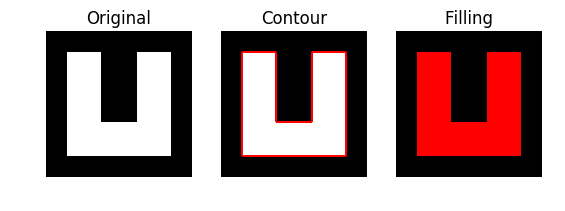

In [2]:
## 从二值图像查找与绘制轮廓
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("data/U.tif")
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thre, imgBinary = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)

# 寻找轮廓
contours,hierarchy=cv2.findContours(imgBinary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contourPic = img.copy() 
contourPic1 = img.copy() 
contourPic = cv2.drawContours(contourPic, contours, -1, (0, 0, 255), 3) 
contourPic1 =cv2.drawContours(contourPic1, contours, -1, (0, 0, 255), thickness=cv2.FILLED) 

# display
images=[img,contourPic,contourPic1]
titles=["Original","Contour","Filling"]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB),"gray")
    plt.title(titles[i])
    plt.axis("off")

> * 获取轮廓后，通常基于轮廓的特征进行筛选、识别和处理。例如，基于轮廓的周长和面积对轮廓进行筛选，然后绘制筛选的目标轮廓或其最小外接矩形。
### Moment 
> * 图像的矩可以帮助我们计算图像的质心，面积等。
> * 轮廓的质心可以通过一阶矩计算
> * 函数 ```cv2.moments()``` 的返回值 ```Moments[‘m00’]``` 表示轮廓面积。轮廓的面积也可以使用函数 ```cv2.contourArea()``` 计算.
> * 函数说明：```cv2.contourArea(contour[, oriented]) ```
>   * contour：顶点构成的二维向量组（如轮廓列表 contours 中的一个轮廓）
>   * oriented：定向区域标志，默认值为 False，返回面积的绝对值，Ture 时则根据轮廓方向返回带符号的数值

### Perimeter
> * 函数说明：```cv2.arcLength(curve, closed=True)```
>   * curve：以顶点构成的二维向量组表示的曲线（如轮廓列表 contours 中的一个轮廓）
>   * closed：曲线闭合标志，True 表示闭合曲线

### Minimum-perimeter Polygons
> * 轮廓的近似是用顶点数量较少的多边形对轮廓进行近似,近似多边形的边数取决于设定的最大近似距离。
> * 函数说明：```approxCurve=cv2.approxPolyDP(curve, epsilon, closed[, approxCurve]) ```
>   * curve：以顶点构成的二维向量组表示的曲线（如轮廓列表 contours 中的一个轮廓）
>   * approxCurve：近似多边形顶点坐标 (x,y) 的二维向量组
>   * epsilon：近似精度，浮点数，原始曲线与近似多边形之间的最大距离
>   * closed：曲线闭合标志，True 表示近似曲线是闭合的

len(contours) =  50
area by moments['m00']:  643040.5
area of contour:  643040.5
centroid of contour: (855, 523)
centroid of perimeter: 6618.7
contours[11] ContourConvex? False
hull.shape:  (30, 1, 2)


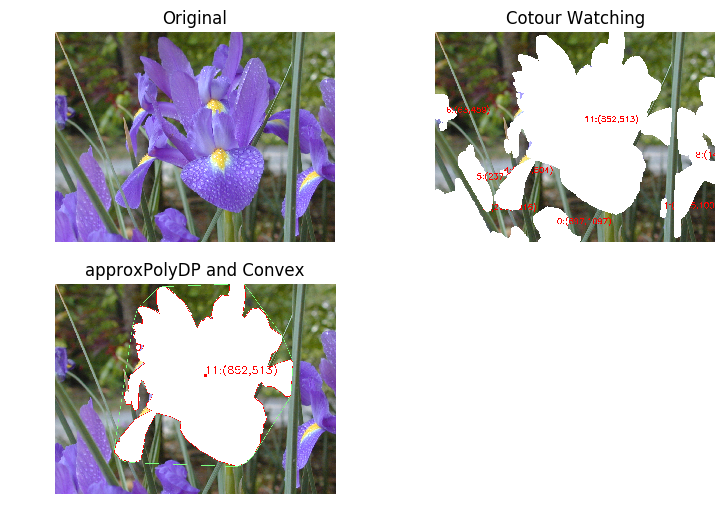

In [4]:
## 轮廓的面积、周长、质心和近似多边形
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/flower_no_compression.tif")
# imgGray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## HSV 色彩空间图像分割
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lowerP = np.array([125, 43, 46])
upperp = np.array([155, 255, 255])

segment = cv2.inRange(hsv, lowerP, upperp)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  

# 图像腐蚀与膨胀
binary = cv2.erode(segment, kernel=kernel, iterations=1)  
binary = cv2.dilate(binary, kernel=kernel, iterations=6)

# 寻找二值化图中的轮廓
contours,hierarchy=cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("len(contours) = ", len(contours))  
imgPic=img.copy()
imgPic2=img.copy()
# 绘制全部轮廓，contourIdx=-1绘制全部轮廓
for i in range(len(contours)):
    # 最外层轮廓（父轮廓）
    if hierarchy[0][i][3]==-1:
    # cv2.minAreaRect 最小外接矩形
        rect=cv2.minAreaRect(contours[i])
        # 最小外接矩形的中心(x,y)
        x, y = int(rect[0][0]), int(rect[0][1])  
        text = "{}:({},{})".format(i, x, y)
        # 用白色内部填充
        imgPic = cv2.drawContours(imgPic, contours, i, (255, 255, 255), -1) 
        imgPic = cv2.putText(imgPic, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX,1.5, (0, 0, 255),3)

# 选取第 12个轮廓
cnt = contours[11]  
rect=cv2.minAreaRect(cnt)
x, y = int(rect[0][0]), int(rect[0][1])
imgPic2 = cv2.drawContours(imgPic2, contours,11, (255, 255, 255), -1) 
cv2.putText(imgPic2, "{}:({},{})".format(11, x, y), (x, y), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 0, 255),3)

# 轮廓的特征矩和面积
moments = cv2.moments(cnt)
area = cv2.contourArea(cnt)
print("area by moments['m00']: ", moments['m00'])
print("area of contour: ", area)
# 轮廓的质心 (Cx, Cy)
if moments['m00'] > 0:
    cx = round(moments['m10'] / moments['m00'])
    cy = round(moments['m01'] / moments['m00'])
    print("centroid of contour: ({}, {})".format(cx, cy))
    # 在轮廓的质心上绘制圆点
    cv2.circle(imgPic2, (cx, cy), 10, (0, 0, 255), -1)  
    
else:
    print("moments['m00'] = 0")

# 轮廓的周长
# True  表示输入是闭合轮廓
perimeter = cv2.arcLength(cnt, True) 
print("centroid of perimeter: {:.1f}".format(perimeter))
# 轮廓近似多边形
epsilon = 0.001 *perimeter
approx = cv2.approxPolyDP(cnt, epsilon, True)
 # 绘制多边形
cv2.polylines(imgPic2, [approx], True, (0, 0, 255), 2) 

# 检查轮廓是否为凸面体
isConvex = cv2.isContourConvex(cnt)  
print("contours[11] ContourConvex?", isConvex)
# 获取轮廓的凸壳,返回轮廓凸壳顶点坐标
hull = cv2.convexHull(cnt, returnPoints=True)  
print("hull.shape: ", hull.shape)  
cv2.polylines(imgPic2, [hull], True, (125, 255, 125), 2)  # 绘制多边形



# display
plt.figure(figsize=(9,6))
images=[cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cv2.cvtColor(imgPic, cv2.COLOR_BGR2RGB),cv2.cvtColor(imgPic2, cv2.COLOR_BGR2RGB)]
titles=["Original","Cotour Watching","approxPolyDP and Convex"]
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.axis("off")

## Feature Optimization
### Principal components analysis
> * 主成分分析方法的思想是，将高维特征（p维）映射到低维空间（k维）上，新的低维特征是在原有的高维特征基础上通过线性组合而重构的，并具有相互正交的特性，称为主成分特性;主成分分析只需要特征值分解，就可以对数据进行压缩、去噪，应用非常广泛。
> * 算法的基本流程如下：
>   * （1）归一化处理，数据减去平均值；
>   * （2）通过特征值分解，计算协方差矩阵；
>   * （3）计算协方差矩阵的特征值和特征向量；
>   * （4）将特征值从大到小排序；
>   * （5）依次选取特征值最大的 k个特征向量作为主成分，直到其累计方差贡献率达到要求；
>   * （6）将原始数据映射到选取的主成分空间，得到降维后的数据。

> * OpenCV 提供了 PCA 类的接口函数 ```cv2.PCACompute()```，```cv2.PCAProject()``` 和 ```cv2.PCABackProject()```--分别对应于执行主成分分析操作，将数据按选择的特征向量投影到PCA特征空间和将特征向量投影从PCA空间投影回原始空间，重建原始数据。
> * 函数说明：
>   * ``` mean, eigenvectors=cv2.PCACompute(data, mean[, eigenvectors=None, maxComponents=0])```
>   * ``` mean, eigenvectors=cv2.PCACompute(data, mean, retainedVariance[, eigenvectors=None]) ```
>   * ```mean, eigenvectors, eigenvalues=cv2.PCACompute2(data, mean[, eigenvectors=None, eigenvalues=None, maxComponents=0])```
>   * ```mean, eigenvectors, eigenvalues=cv2.PCACompute2(data, mean, retainedVariance[, eigenvectors=None, eigenvalues=None]) ```
>   * ```result=cv2.PCAProject(data, mean, eigenvectors[, result=None]) ```
>   * ```result=cv2.PCABackProject(data, mean, eigenvectors[, result=None])```
>   * ``` eigenvectors```表示协方差矩阵的特征向量，```eigenvalues```表示协方差矩阵的特征值，``` mean```表示均值，投影前减去均值，投影后加上均值
>   * ```retainedVariance ```– Percentage of variance that PCA should retain。

> * 实验所给6幅多光光谱图像，这些图像对应于6个谱带：可见蓝光（450-520nm）、可见绿光（520-600nm）、可见红光（630-690nm）、近红外（760-900nm）、中红外（1550-1750nm）和热红外（10400-12500nm）。

(1, 6) (3, 6) (3, 1)
number of samples: m= 318096
number of features: p= 6
number of PCA features: k= 3
mean: [[ 61.9724  67.5084  62.1467 146.1866 134.4214 111.4343]]
topK eigenvalues:
 [[10344.2723]
 [ 2965.8884]
 [ 1400.6306]]
topK eigenvectors:
 [[ 0.489   0.4777  0.4899 -0.1375  0.2188  0.4753]
 [-0.0124  0.0394 -0.022   0.7986  0.5981 -0.0486]
 [-0.2301 -0.3012 -0.315   0.0431  0.0165  0.8689]]
(318096, 3)


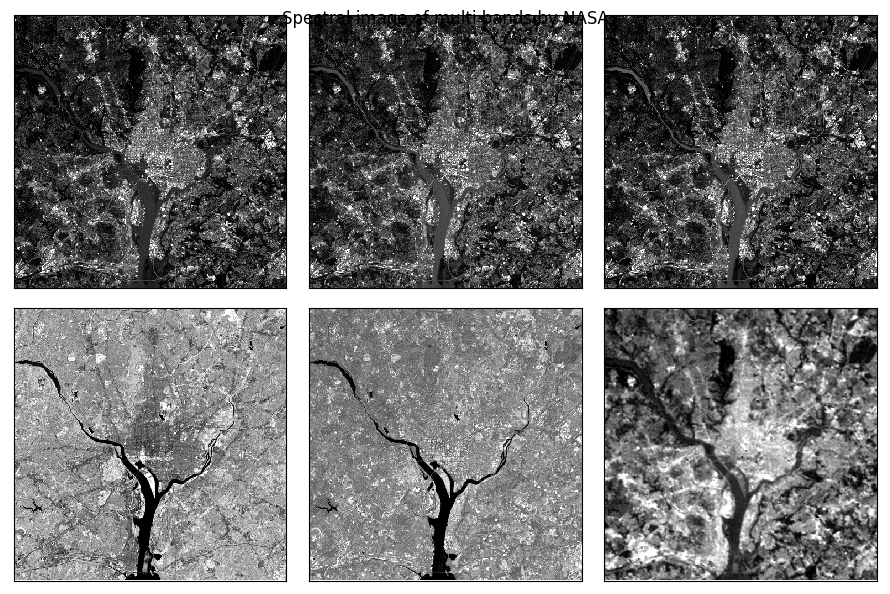

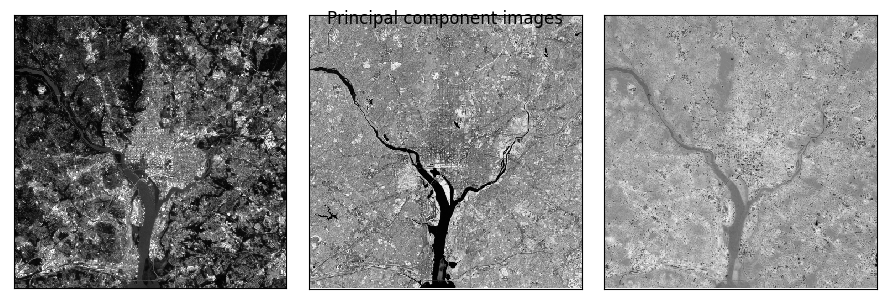

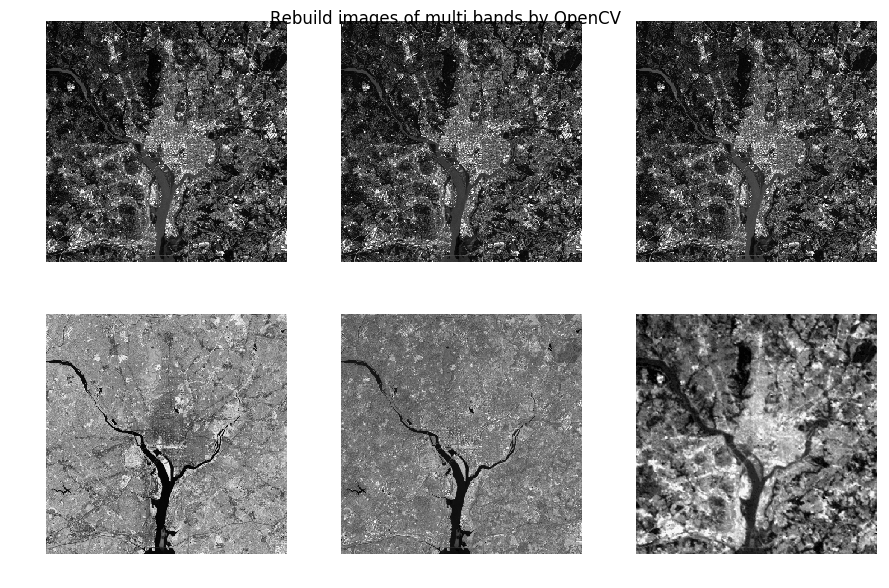

In [15]:
## 特征描述之主成分分析 
import cv2
import matplotlib.pyplot as plt
import numpy as np
# 读取光谱图像组
img = cv2.imread("data/WashingtonDC_Band1_564.tif", flags=0)
height, width = img.shape[:2] # (564, 564)
# 光谱波段种类
nBands = 6  
snBands = [1,2,3,4,5,6] 
imgMulti = np.zeros((height, width, nBands))  

# Xmat = np.zeros((img.size, nBands))  # (318096, 6)
# print(imgMulti.shape, Xmat.shape)

# 显示光谱图像组
fig1 = plt.figure(figsize=(9, 6))  # 原始图像，6 个不同波段
fig1.suptitle("Spectral image of multi bands by NASA")
for i in range(nBands):
    path = "data/WashingtonDC_Band{}_564.tif".format(snBands[i])
    imgMulti[:,:,i] = cv2.imread(path, flags=0)  # 灰度图像
    ax1 = fig1.add_subplot(2,3,i+1)
    ax1.set_xticks([]), ax1.set_yticks([])
    ax1.imshow(imgMulti[:,:,i], 'gray')  # 绘制光谱图像 snBands[i]
plt.tight_layout()

# 主成分分析 (principal component analysis)
m, p = Xmat.shape  # m：训练集样本数量，p：特征维度数
Xmat = np.reshape(imgMulti, (-1, nBands))  # (564,564,6) -> (318096,6)，-1表示自行计算
# np.empty((0))也即[]
mean, eigenvectors, eigenvalues = cv2.PCACompute2(Xmat, np.empty((0)), retainedVariance=0.98)  
print(mean.shape, eigenvectors.shape, eigenvalues.shape)  # (1, 6) (3, 6) (3, 1)
# eigenvalues = np.squeeze(eigenvalues)  # 删除维度为1的数组维度，(3,1)->(3,)

# 保留的主成分数量
K = eigenvectors.shape[0]  # 主成分方差贡献率 98% 时的特征维数 K=3
print("number of samples: m=", m)  # 样本集的样本数量 m=318096
print("number of features: p=", p)  # 样本集的特征维数 p=6
print("number of PCA features: k=", K)  # 降维后的特征维数，主成分个数 k=3
print("mean:", mean.round(4))  # 均值,保留4位小数
print("topK eigenvalues:\n", eigenvalues.round(4))  # 特征值，从大到小
print("topK eigenvectors:\n", eigenvectors.round(4))  # (3, 6)

# 压缩图像特征，将输入数据按主成分特征向量投影到 PCA 特征空间
mbMatPCA = cv2.PCAProject(Xmat, mean, eigenvectors)  # (318096, 6)->(318096, K=3)
print(mbMatPCA.shape)
# 显示主成分变换图像
fig2 = plt.figure(figsize=(9, 6))  # 主元素图像
fig2.suptitle("Principal component images")
for i in range(K):
    pca = mbMatPCA[:, i].reshape(-1, img.shape[1])  # 主元素图像 (564, 564)
    imgPCA = np.uint8(cv2.normalize(pca, None, 0, 255,  cv2.NORM_MINMAX))
    ax2 = fig2.add_subplot(2,3,i+1)
    ax2.set_xticks([]), ax2.set_yticks([])
    ax2.imshow(imgPCA, 'gray')  # 绘制主成分图像
plt.tight_layout()

# # 由主成分分析重建图像
reconMat = cv2.PCABackProject(mbMatPCA, mean, eigenvectors)  # (318096, K=3)->(318096, 6)
fig3 = plt.figure(figsize=(9, 6))  # 重建图像，6 个不同波段
fig3.suptitle("Rebuild images of multi bands by OpenCV")
rebuild = np.zeros((height, width, nBands))  # (564, 564, 6)
for i in range(nBands):
    rebuild = reconMat[:, i].reshape(-1, img.shape[1])   # 主元素图像 (564, 564)
    rebuild = np.uint8(cv2.normalize(rebuild, None, 0, 255,  cv2.NORM_MINMAX))
    ax3 = fig3.add_subplot(2,3,i+1)
    ax3.axis("off")
    ax3.imshow(rebuild, 'gray')  # 绘制光谱图像 snBands[i]
plt.tight_layout()
plt.show()


## Region features 
### Co-occurrence matrices
> * 灰度共生矩阵（Gray level co-occurrence matrix，GLCM）是特征检测与分析的重要方法，在纹理分析、特征分类、图像质量评价中应用广泛 。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``sk

(16, 16, 2, 4)
contrast: [[0.2452 0.3038 0.1771 0.2777]
 [0.9498 0.8335 0.5747 0.8177]]
dissimilarity: [[0.2133 0.2486 0.1714 0.2442]
 [0.5181 0.4765 0.3882 0.4918]]
homogeneity: [[0.8964 0.8809 0.9148 0.8811]
 [0.778  0.7923 0.8229 0.7831]]
energy: [[0.2856 0.2778 0.2962 0.2766]
 [0.2304 0.2366 0.2496 0.2317]]
correlation: [[0.977  0.9715 0.9834 0.9739]
 [0.9109 0.9218 0.9461 0.9233]]
ASM: [[0.0816 0.0772 0.0877 0.0765]
 [0.0531 0.056  0.0623 0.0537]]


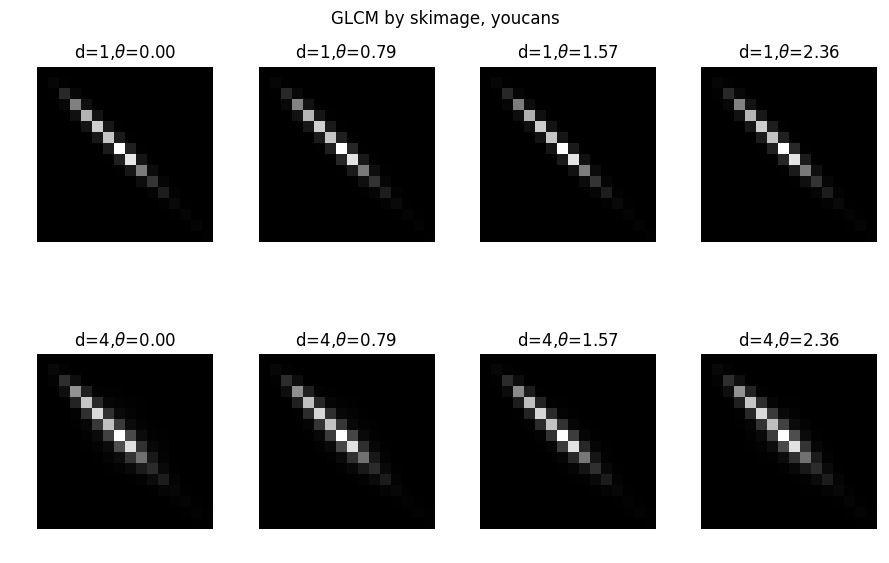

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import greycomatrix, greycoprops

img = cv2.imread("data/flower_no_compression.tif", flags=1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 灰度图像
height, width = gray.shape
table16 = np.array([(i//16) for i in range(256)]).astype("uint8")  # 16 levels
gray16 = cv2.LUT(gray, table16)  # 灰度级压缩为 [0,15]

# 计算灰度共生矩阵 GLCM
dist = [1, 4]  # 计算 2 个距离偏移量 [1, 2]
degree = [0, np.pi/4, np.pi/2, np.pi*3/4]  # 计算 4 个方向
glcm = greycomatrix(gray16, dist, degree, levels=16)  # 灰度级 L=16
print(glcm.shape)  # (16,16,2,4)

# 由灰度共生矩阵 GLCM 计算特征统计量
for prop in ['contrast', 'dissimilarity','homogeneity', 'energy', 'correlation', 'ASM']:
    feature= greycoprops(glcm, prop).round(4)  # (2,4)
    print("{}: {}".format(prop, feature))

plt.figure(figsize=(9, 6))
plt.suptitle("GLCM by skimage, youcans")
for i in range(len(dist)):
    for j in range(len(degree)):
        plt.subplot(2,4,i*4+j+1), plt.axis('off')
        plt.title(r"d={},$\theta$={:.2f}".format(dist[i], degree[j]))
        plt.imshow(glcm[:,:,i,j], 'gray')
plt.tight_layout()
plt.show()


## Whole-image features
### SIFT
> * 尺度不变特征转换算法（Scale-invariant feature transform，SIFT）是图像处理中经典的局部特征描述算法，广泛应用于物体识别、动作识别、影像配准、影像追踪和 3D 建模。
> * SIFT 算法查找的关键点都是高度显著且容易获取的“稳定”特征点，如角点、边缘点、暗区的亮点以及亮区的暗点等，这些特征与大小、旋转无关，对于光线、噪声、视角改变的鲁棒性也很高。

> * （1）构造 SIFT 对象：OpenCV 提供了 SIFT 类的接口函数 ```cv2.SIFT.create()``` 实例化 SIFT 类:
>   * ``` retval=cv2.SIFT.create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]) ```
>    * ```retval=cv2.SIFT.create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma, descriptorType)```
>    * ```retval=cv2.SIFT_create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]) ```
>    * ```retval=cv2.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma, descriptorType) ```
> * 参数说明：
>    * nfeatures：保留的最佳特征的数量，按算法测度值大小排序
>    * nOctaveLayers：每个倍频程的层数，根据图像分辨率自动计算得到
>    * contrastThreshold：对比度阈值，用于滤除低对比度的弱特征，默认值 0.04
>    * edgeThreshold：用于过滤边缘特征的阈值，默认值 10
>    * sigma：高斯模糊系数 $\sigma$ 的初值，默认值 1.6
>    * descriptorType：描述符的类型，仅支持 CV_32F 和 CV_8U

> * （2）检测特征点：
> * 函数说明：``` keypoints=sift.detect(image, [, mask]) ```
> * 参数说明：
>   * sift：实例化的 SIFT 对象
>   * image：输入图像，单通道
>   * mask：掩模图像，8 位单通道，指定查找关键点的区域，可选项
>   * keypoints ：检测到的关键点，是一个特殊的数据结构，包括以下属性：
>       * Point2f pt：坐标
>       * float size：关键点的邻域直径
>       * float angle：关键点的方向，取值为 $[0，360)$
>       * float response：关键点的响应强度
>       * int octave：关键点所在的图像金字塔的组
>       * int class_id：关键点的 id 编号

> * （3）绘制特征点：
> * 函数说明：```outImage=cv2.drawKeypoint(image, keypoints, outImage[, color[, flags]])  ```
> * 参数说明：
>   * image：输入图像
>   * keypoints：输入图像，单通道
>   * outimage：输出图像，
>   * color：绘制关键点的颜色
>   * flags：绘制关键点特征的选择
>       * cv2.DRAW_MATCHES_FLAGS_DEFAULT，默认值，对每个关键点仅绘制中心点，不包括围绕关键点的圆和大小、方向
>       * cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS，对于每个关键点绘制表示关键点大小和方向的圆
>       * cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG，在输入图像上绘制匹配关系
>       * cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS，不绘制单个关键点



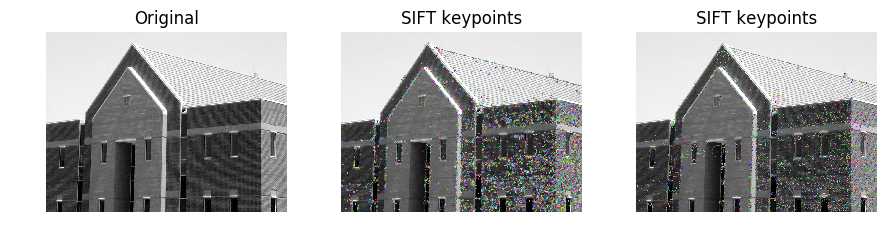

In [9]:
## 特征检测之尺度不变特征变换 (SIFT)
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/house.tif") 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray=cv2.medianBlur(gray,5)

# SIFT 关键点检测
sift = cv2.SIFT.create()  # sift实例化对象
kp = sift.detect(gray, None)  # 关键点检测，kp 为关键点信息（包括方向）
# kp, des = sift.compute(gray, None)  # 关键点检测，des 为特征描述向量
img1 = cv2.drawKeypoints(img, kp, None)  # 只绘制关键点位置
img2 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # 关键点大小和方向

# display
plt.figure(figsize=(9, 6))
images=[cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)]
titles=["Original","SIFT keypoints","SIFT keypoints"]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()



### Harris 
> * 角是高度有效的特征。角点检测（Corner Detection）广泛应用于运动检测、图像匹配、视频跟踪、三维重建和目标识别。
> * 在基于灰度变换的角点检测算法中，Harris 算法重复性良好、检测效率较高，应用较为广泛。
> * 其原理是，通过检测窗口在图像上移动，计算移动前后窗口中像素的灰度变化。角点是两条边的交点，其特征是检测窗口沿任意方向移动都会导致灰度的显著变化。
>  * OpenCV 中提供了 Harris 角点检测函数 ```cv2.cornerHarris()```。
> * 函数说明:```dst=cv2.cornerHarris(src, blockSize, ksize, k[, dst=None, borderType=BORDER_DEFAULT]) ```
> * 参数说明：
>   * src：输入图像，单通道的8位图像或浮点数图像
>   * dst：输出图像，Harris 检测器的响应，大小与 src 相同，格式为 CV_32FC1
>   * blockSize：邻域尺寸
>   * ksize：Sobel 算子的孔径参数
>   * k：Harris 检测器调节参数，通常取 0.04~0.06
>   * borderType：边界扩充类型
>       * cv2.BORDER_CONSTANT
>       * cv2.BORDER_REPLICATE
>       * cv2.BORDER_REFLECT
>       * cv2.BORDER_REFLECT_101
>       * cv2.BORDER_TRANSPARENT




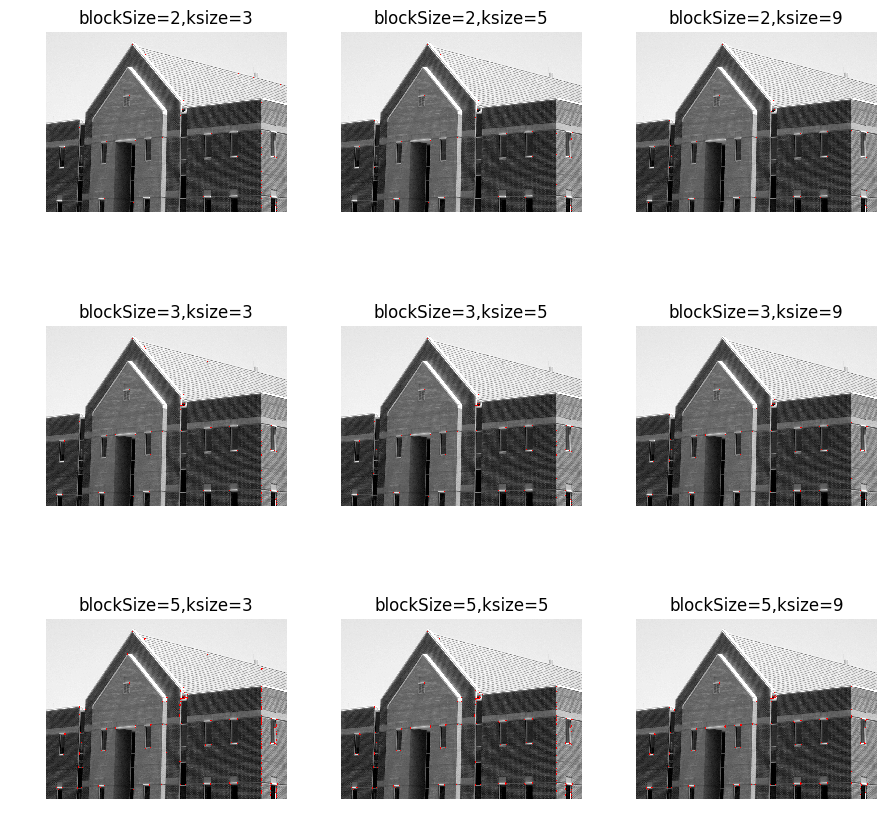

In [8]:
## 角点检测之 Harris 算法
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/house.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# gray = np.float32(gray)  # uint8，float32 都支持

blockSize = [2, 3, 5]  # 滑动窗口大小
ksize = [3, 5, 9]  # Sobel 核函数大小
plt.figure(figsize=(9, 9))
for i in range(len(blockSize)):
    for j in range(len(ksize)):
        dst = cv2.cornerHarris(gray, blockSize[i], ksize[j], k=0.04)
        imgCorner = np.copy(img)
        imgCorner[dst > 0.03*dst.max()] = [0, 0, 255]  # 筛选角点，红色标记
        plt.subplot(3,3,i*len(ksize)+j+1), plt.axis('off')
        plt.imshow(cv2.cvtColor(imgCorner, cv2.COLOR_BGR2RGB))
        plt.title("blockSize={},ksize={}".format(blockSize[i], ksize[j]))

plt.tight_layout()
plt.show()